clap plotter 

In [1]:
!pip install sounddevice

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Maxle\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
'constants'
samplerate = 44100  # Samples per second
duration_after_clap = 3  # Seconds to record after clap
threshold = 0.5  # Adjust based on your mic and environment
blocksize = 1024  # Size of audio chunks


Listening for a clap...


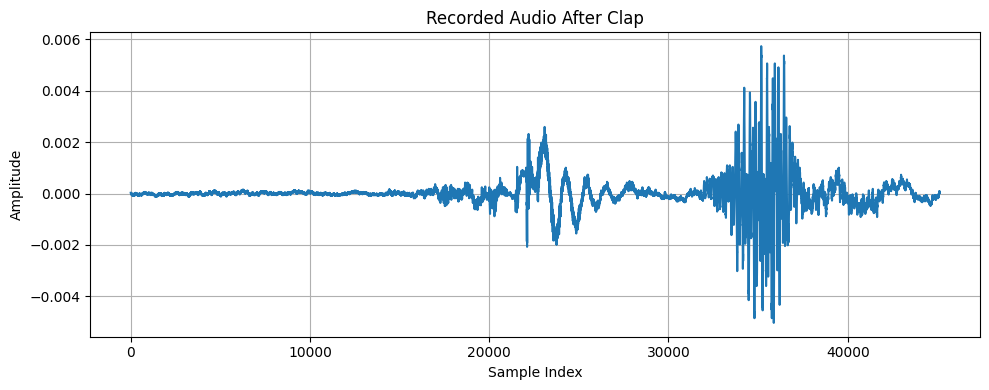

: 

In [ ]:
buffer = []
recording = False
start_time = None

def audio_callback(indata, frames, time_info, status):
    global recording, start_time, buffer

    audio_chunk = indata[:, 0] 
    energy = np.max(np.abs(audio_chunk))

    if not recording:
        if energy > threshold:
            print("Clap detected!")
            recording = True
            start_time = time.time()
            buffer.extend(audio_chunk)
        # Only store a tiny bit before the clap
        else:
            buffer = buffer[-samplerate:] + list(audio_chunk)
    else:
        buffer.extend(audio_chunk)
        if time.time() - start_time >= duration_after_clap:
            print("Finished recording.")
            sd.stop()

print("Listening for a clap...")

with sd.InputStream(callback=audio_callback, channels=1,
                    samplerate=samplerate, blocksize=blocksize):
    sd.sleep(10000)  # Run for max 10 seconds if no clap detected

# Convert buffer to numpy array for plotting
audio_data = np.array(buffer)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(audio_data)
plt.title("Recorded Audio After Clap")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()